# Practical 4
## Part 1: 
Generate 61 points for sin(x). Use this dataset to train two layer neural networks using
gradient descent learning algorithm. Draw two curves with different colours, for target and
output (y) of the trained neural network.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.mnist as mnist
from keras.utils import np_utils

In [5]:
# creating the base layer

class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass

In [6]:
# creating the Dense layer

import numpy as np

class Layer_Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size,input_size)
        self.biases = np.random.randn(output_size,1)
        

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input ) + self.biases

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient,self.input.T )
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.biases -=learning_rate * output_gradient
        return input_gradient

In [7]:
# creating the activation layer

class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [8]:
# creating the activation functions

# Linear function
class Linear(Activation):
    def __init__(self):
        def linear(x):
            return x
        
        def linear_prime(x):
            return 1
        
        super().__init__(linear, linear_prime)

# Tanh function
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)
        
        def tanh_prime(x):
            return 1 - np.tanh(x)**2
        
        super().__init__(tanh, tanh_prime)


# Sigmoid function
class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        
        def sigmoid_prime(x):
            return sigmoid(x)*(1-sigmoid(x))
        
        super().__init__(sigmoid, sigmoid_prime)

In [9]:
# creating the loss function

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

# creating the loss function derivative

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

In [30]:
# Training the network
def train(network, loss, loss_prime,x_train, y_train, epochs=10, learning_rate=0.1, verbose=True):
    for e in range (epochs):
        error = 0
        for x,y in zip(x_train, y_train):
            output = predict(network, x)
            error += loss(y, output)
            output_gradient = loss_prime(y, output)
            for layer in reversed(network):
                output_gradient = layer.backward(output_gradient, learning_rate)

        error  /=len(x_train)

        if verbose:
            # print only once in 1000 epoch
            if e % 1000 == 0:
                print(f"Epoch: {e}, Error: {error}")
           



# Testing the network
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

# visualizing the network
def visualize(input , target , predicted):
    plt.scatter(input, predicted, 
            linewidths = 2,
            marker ="*",
            edgecolor ="black",
            s = 50)
 
    plt.plot(input, target,c='red', linewidth = 2)
     
    plt.xlabel("X")
    plt.ylabel("Predicted and Actual Output")
    plt.legend(["Predicted Output", "Actual Output"])
    plt.show()

In [31]:

# creating the neural network

X = np.linspace(-3,3,61)
Y = np.sin (X)

network = [ 
    Layer_Dense(1, 10),
    Tanh(),
    Layer_Dense(10, 1),
    Linear()
]

epochs = 10000
learning_rate = 0.1
verbose = True

train(network, mse, mse_prime, X, Y, epochs, learning_rate)


Epoch: 0, Error: 2.0782737304606864
Epoch: 1000, Error: 0.01495883428387625
Epoch: 2000, Error: 0.004493493667589283
Epoch: 3000, Error: 0.0014445203267379166
Epoch: 4000, Error: 0.001261343054362468
Epoch: 5000, Error: 0.0010846255802303808
Epoch: 6000, Error: 0.000936524528940877
Epoch: 7000, Error: 0.0008268631253502414
Epoch: 8000, Error: 0.000751774103205051
Epoch: 9000, Error: 0.0007022200278781874


In [32]:
predicted_arr = []
for x,y in zip(X,Y):
    output = predict(network, x)
    predicted_arr.append(output)
    print("Input: %.3f, Predicted: %.3f, Target: %.3f" % (x, output, y))


Input: -3.000, Predicted: -0.214, Target: -0.141
Input: -2.900, Predicted: -0.270, Target: -0.239
Input: -2.800, Predicted: -0.338, Target: -0.335
Input: -2.700, Predicted: -0.417, Target: -0.427
Input: -2.600, Predicted: -0.505, Target: -0.516
Input: -2.500, Predicted: -0.595, Target: -0.598
Input: -2.400, Predicted: -0.682, Target: -0.675
Input: -2.300, Predicted: -0.761, Target: -0.746
Input: -2.200, Predicted: -0.828, Target: -0.808
Input: -2.100, Predicted: -0.883, Target: -0.863
Input: -2.000, Predicted: -0.924, Target: -0.909
Input: -1.900, Predicted: -0.955, Target: -0.946
Input: -1.800, Predicted: -0.975, Target: -0.974
Input: -1.700, Predicted: -0.987, Target: -0.992
Input: -1.600, Predicted: -0.991, Target: -1.000
Input: -1.500, Predicted: -0.987, Target: -0.997
Input: -1.400, Predicted: -0.977, Target: -0.985
Input: -1.300, Predicted: -0.958, Target: -0.964
Input: -1.200, Predicted: -0.930, Target: -0.932
Input: -1.100, Predicted: -0.893, Target: -0.891
Input: -1.000, Predi

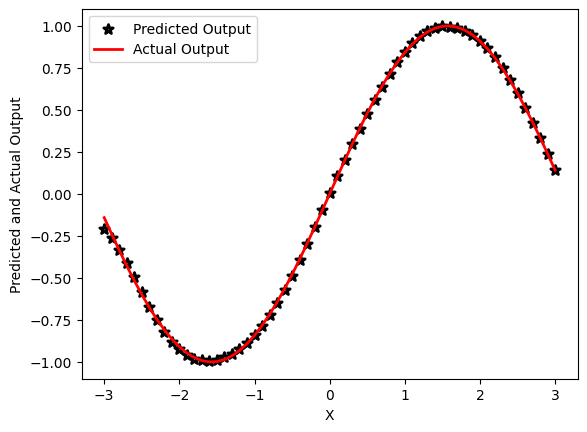

In [13]:
visualize(X, Y, predicted_arr)

# B - MNIST Classification with a ANN

### Creating the function to train and predict

In [42]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def train2(network, loss, loss_prime,x_train, y_train, epochs=10, learning_rate=0.1):
    for e in range (epochs):
        error = 0
        for x,y in zip(x_train, y_train):
            output = predict(network, x)
            error += loss(y, output)
            output_gradient = loss_prime(y, output)
            for layer in reversed(network):
                output_gradient = layer.backward(output_gradient, learning_rate)

        error  /=len(x_train)

        if verbose:
            # print only once in 10 epoch
            if e % 10 == 0:
                print(f"Epoch: {e}, Error: {error}")
     

In [43]:
def preprocess_data (x,y,limit):
    x = x.reshape(x.shape[0], 28*28, 1)
    x = x.astype('float32')/255

    y = np_utils.to_categorical(y, 10)
    y  = y.reshape(y.shape[0], 10, 1)

    x_train = x[:limit]
    y_train = y[:limit]

    return x_train, y_train

In [44]:
# loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 5000)
x_test, y_test = preprocess_data(x_test, y_test, 20)

### Creating the Neural Network

In [45]:
# creating the network
# dense (28*28,100)
# activation (tanh)
# dense (100,10)
# activation (sigmoid)
network = [
    Layer_Dense(28*28, 40),
    Tanh(),
    Layer_Dense(40, 10),
    Sigmoid()
]

# training the network
train2(network, mse, mse_prime, x_train, y_train, epochs=100, learning_rate=0.1)   

Epoch: 0, Error: 0.11751767804562543
Epoch: 10, Error: 0.0469624124104349
Epoch: 20, Error: 0.03464834543466927
Epoch: 30, Error: 0.029712870255441157
Epoch: 40, Error: 0.024277121553593597
Epoch: 50, Error: 0.02119239300584351
Epoch: 60, Error: 0.01915696579617546
Epoch: 70, Error: 0.017911994255754574
Epoch: 80, Error: 0.01697553909406824
Epoch: 90, Error: 0.016240596123270713


### Testing the Neural Network

In [46]:
# testing the network
for x,y in zip(x_test, y_test):
    output = predict(network, x)
    print("Original: %d, Predicted: %d" % (np.argmax(y), np.argmax(output)))


Original: 7, Predicted: 7
Original: 2, Predicted: 2
Original: 1, Predicted: 1
Original: 0, Predicted: 0
Original: 4, Predicted: 4
Original: 1, Predicted: 1
Original: 4, Predicted: 4
Original: 9, Predicted: 9
Original: 5, Predicted: 2
Original: 9, Predicted: 9
Original: 0, Predicted: 0
Original: 6, Predicted: 6
Original: 9, Predicted: 9
Original: 0, Predicted: 0
Original: 1, Predicted: 1
Original: 5, Predicted: 3
Original: 9, Predicted: 9
Original: 7, Predicted: 7
Original: 3, Predicted: 7
Original: 4, Predicted: 4


In [20]:
# calculating the accuracy
correct = 0
for x,y in zip(x_test, y_test):
    output = predict(network, x)
    if np.argmax(y) == np.argmax(output):
        correct += 1

# printing the accuracy in percentage
Accuracy = correct/len(x_test) * 100

print("Accuracy: ", Accuracy, "%")


Accuracy:  80.0 %
